In [562]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CapstoneProject-ML-AlvinSengkey/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/CapstoneProject-ML-AlvinSengkey


# Villages Recommender System
<hr>

#### Dataset source: https://www.kaggle.com/aprabowo/indonesia-tourism-destination

## 1. Import Library

In [563]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

import os

## 2. Prepare dataset

In [564]:
!pwd

/content/drive/My Drive/CapstoneProject-ML-AlvinSengkey


In [565]:
rating = pd.read_csv('/content/drive/My Drive/CapstoneProject-ML-AlvinSengkey/archive/tourism_rating.csv')
place = pd.read_csv('/content/drive/My Drive/CapstoneProject-ML-AlvinSengkey/archive/tourism_with_id.csv')
user = pd.read_csv('/content/drive/My Drive/CapstoneProject-ML-AlvinSengkey/archive/user.csv')

all = pd.read_csv('/content/drive/My Drive/CapstoneProject-ML-AlvinSengkey/archive/all.csv')

In [566]:
# Place only desa / kampung

place = place[place['Place_Name'].str.contains('Desa') | place['Place_Name'].str.contains('Kampung')]
place.shape

(19, 13)

In [567]:
place = place.drop(['Unnamed: 11','Unnamed: 12','Time_Minutes','Lat','Long','Coordinate'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
51,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5
89,90,Kampung Wisata Taman Sari,Taman Sari Yogyakarta atau Taman Sari Keraton ...,Taman Hiburan,Yogyakarta,5000,4.6


In [568]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 51 to 384
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     19 non-null     int64  
 1   Place_Name   19 non-null     object 
 2   Description  19 non-null     object 
 3   Category     19 non-null     object 
 4   City         19 non-null     object 
 5   Price        19 non-null     int64  
 6   Rating       19 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB


In [569]:
# every rating
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [570]:
# every rating
rating.info()
rating.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


(10000, 3)

In [571]:
# Rating only in desa / kampung

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,12,52,3
1,25,52,3
2,37,52,2
3,43,52,5
4,52,52,2


In [572]:
rating.shape

(423, 3)

In [573]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [574]:
user.shape

(300, 3)

In [575]:
# User visits only desa / kampung

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
91,1,"Semarang, Jawa Tengah",20
380,2,"Bekasi, Jawa Barat",21
135,3,"Cirebon, Jawa Barat",23
187,5,"Lampung, Sumatera Selatan",20
273,6,"Jakarta Utara, DKI Jakarta",18


In [576]:
user.shape

(222, 3)

In [577]:
all.shape
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     423 non-null    int64  
 1   User_Id        423 non-null    int64  
 2   Place_Id       423 non-null    int64  
 3   Place_Ratings  423 non-null    int64  
 4   Place_Name     423 non-null    object 
 5   Description    423 non-null    object 
 6   Category       423 non-null    object 
 7   City           423 non-null    object 
 8   Price          423 non-null    int64  
 9   Rating         423 non-null    float64
 10  Coordinate     423 non-null    object 
 11  Lat            423 non-null    float64
 12  Long           423 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 43.1+ KB


In [578]:
all.head()

,Unnamed: 0,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,0,12,52,3,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
1,1,25,52,3,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
2,2,37,52,2,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
3,3,43,52,5,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
4,4,52,52,2,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798


## Copy data to df

In [580]:
df = all.copy()
df.head()

,Unnamed: 0,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,0,12,52,3,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
1,1,25,52,3,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
2,2,37,52,2,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
3,3,43,52,5,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
4,4,52,52,2,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798


## Encoding

In [582]:
def dict_encoder(col, data=df):

  # Change dataframe column into unique list
  print('col:',col)
  print('data[col]:',data[col])
  unique_val = data[col].unique().tolist()
  print('unique_val:',unique_val)
  print('data[col].shape:',data[col].shape)
  print('unique_val.shape:',len(unique_val))

  # Encoding column value to number
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}
  print('val_to_val_encoded.len:',len(val_to_val_encoded))
  # Encoding number to column value
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  print(val_to_val_encoded)
  print(val_encoded_to_val)
  return val_to_val_encoded, val_encoded_to_val

In [583]:
# Encoding User_Id
city_to_city_encoded, city_encoded_to_city = dict_encoder('City')

# print("df['user']:",df['user'])
print("df['City']:",df['City'])
print("df['City'](2):",df['City'].map(city_to_city_encoded))

# Mapping City to dataframe
df['city'] = df['City'].map(city_to_city_encoded)

col: City
data[col]: 0       Jakarta
1       Jakarta
2       Jakarta
3       Jakarta
4       Jakarta
         ...   
418    Semarang
419    Semarang
420    Semarang
421    Semarang
422    Semarang
Name: City, Length: 423, dtype: object
unique_val: ['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang']
data[col].shape: (423,)
unique_val.shape: 4
val_to_val_encoded.len: 4
{'Jakarta': 0, 'Yogyakarta': 1, 'Bandung': 2, 'Semarang': 3}
{0: 'Jakarta', 1: 'Yogyakarta', 2: 'Bandung', 3: 'Semarang'}
df['City']: 0       Jakarta
1       Jakarta
2       Jakarta
3       Jakarta
4       Jakarta
         ...   
418    Semarang
419    Semarang
420    Semarang
421    Semarang
422    Semarang
Name: City, Length: 423, dtype: object
df['City'](2): 0      0
1      0
2      0
3      0
4      0
      ..
418    3
419    3
420    3
421    3
422    3
Name: City, Length: 423, dtype: int64


In [584]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id to dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

col: Place_Id
data[col]: 0       52
1       52
2       52
3       52
4       52
      ... 
418    385
419    385
420    385
421    385
422    385
Name: Place_Id, Length: 423, dtype: int64
unique_val: [52, 90, 95, 99, 101, 123, 134, 145, 151, 162, 204, 205, 243, 244, 337, 340, 361, 384, 385]
data[col].shape: (423,)
unique_val.shape: 19
val_to_val_encoded.len: 19
{52: 0, 90: 1, 95: 2, 99: 3, 101: 4, 123: 5, 134: 6, 145: 7, 151: 8, 162: 9, 204: 10, 205: 11, 243: 12, 244: 13, 337: 14, 340: 15, 361: 16, 384: 17, 385: 18}
{0: 52, 1: 90, 2: 95, 3: 99, 4: 101, 5: 123, 6: 134, 7: 145, 8: 151, 9: 162, 10: 204, 11: 205, 12: 243, 13: 244, 14: 337, 15: 340, 16: 361, 17: 384, 18: 385}


In [585]:
# # Encoding Price
# price_to_price_encoded, price_encoded_to_price = dict_encoder('Price')

# # Mapping Price to dataframe price
# df['price'] = df['Price'].map(price_to_price_encoded)

In [586]:
# Encoding Category
category_to_category_encoded, category_encoded_to_category = dict_encoder('Category')

# Mapping Category to dataframe category
df['category'] = df['Category'].map(category_to_category_encoded)

col: Category
data[col]: 0      Budaya
1      Budaya
2      Budaya
3      Budaya
4      Budaya
        ...  
418    Budaya
419    Budaya
420    Budaya
421    Budaya
422    Budaya
Name: Category, Length: 423, dtype: object
unique_val: ['Budaya', 'Taman Hiburan']
data[col].shape: (423,)
unique_val.shape: 2
val_to_val_encoded.len: 2
{'Budaya': 0, 'Taman Hiburan': 1}
{0: 'Budaya', 1: 'Taman Hiburan'}


In [587]:
# Number of cities and places
num_cities, num_place, num_category = len(city_to_city_encoded), len(place_to_place_encoded), len(category_to_category_encoded)

# Convert rating values into float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# get min and max rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of City: {num_cities}, Number of Place: {num_place}, Number of Catehory: {num_category}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of City: 4, Number of Place: 19, Number of Catehory: 2, Min Rating: 1.0, Max Rating: 5.0


In [588]:
# Random
df = df.sample(frac=1, random_state=41)
df.head()

,Unnamed: 0,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,city,place,category
270,270,256,205,3.0,Desa Wisata Tembi,"Desa Wisata Tembi, merupakan satu dari sekian ...",Taman Hiburan,Yogyakarta,50000,4.5,"{'lat': -7.872567300000001, 'lng': 110.3546963}",-7.872567,110.354696,1,11,1
350,350,138,340,4.0,Desa Wisata Lembah Kalipancur,Wisata alam tengah menjadi sorotan bagi dunia ...,Taman Hiburan,Semarang,0,3.9,"{'lat': -7.0205245, 'lng': 110.3754605}",-7.020524,110.375461,3,15,1
195,195,97,151,3.0,Desa Wisata Kelor,Desa wisata Kelor merupakan salah satu desa ya...,Taman Hiburan,Yogyakarta,0,4.4,"{'lat': -7.641025800000001, 'lng': 110.3622794}",-7.641026,110.362279,1,8,1
320,320,299,244,4.0,Kampung Batu Malakasari,Kampung Batu Malakasari adalah sebuah tempat w...,Taman Hiburan,Bandung,10000,4.1,"{'lat': -7.0093633, 'lng': 107.6069444}",-7.009363,107.606944,2,13,1
143,143,75,134,3.0,Desa Wisata Gamplong,Desa Wisata Gamplong adalah desa wisata keraji...,Taman Hiburan,Yogyakarta,10000,4.4,"{'lat': -7.805523199999997, 'lng': 110.2374676}",-7.805523,110.237468,1,6,1


## 3. Modelling

## Train & Test

In [589]:
# Variable x ; City and place data into one value
x = df[['city', 'category']].values
print('x:',x)

# Variable y ; For places
y = df['place'].apply(lambda x: x/18).values
print('\ny:',y)

# 75% training, 25% validation
train_indices = int(0.75 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print('\nlength:',x_train.shape, len(x_val), len(y_train), len(y_val))

x: [[1 1]
 [3 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [3 0]
 [3 1]
 [3 1]
 [3 0]
 [1 0]
 [3 1]
 [1 0]
 [1 0]
 [2 1]
 [1 0]
 [1 1]
 [1 0]
 [3 0]
 [3 0]
 [0 0]
 [1 1]
 [2 1]
 [3 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [3 1]
 [1 1]
 [3 1]
 [3 1]
 [3 1]
 [3 0]
 [1 0]
 [2 0]
 [1 0]
 [3 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [3 1]
 [1 1]
 [2 1]
 [1 0]
 [3 1]
 [1 1]
 [2 1]
 [1 0]
 [3 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [2 1]
 [3 0]
 [3 1]
 [2 1]
 [2 1]
 [1 0]
 [1 1]
 [1 0]
 [3 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [2 1]
 [1 0]
 [1 1]
 [3 1]
 [3 0]
 [0 0]
 [1 1]
 [3 0]
 [3 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [3 0]
 [3 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [3 0]
 [3 0]
 [2 1]
 [3 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [3 1]
 [1 1]
 [2 1]
 [1 1]
 [3 1]
 [0 0]
 [1 1]
 [2 1]
 [3 1]
 [1 1]
 [1 0]
 [1 0]
 [3 1]
 [3 1]
 [1 0]
 [1 1]
 [3 0]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [3

## RecommenderNet

In [590]:
class RecommenderNet(tf.keras.Model):

  # Function initialization
  def __init__(self, num_cities, num_categories, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_cities = num_cities
    self.num_categories = num_categories
    self.num_places = num_places
    self.embedding_size = embedding_size

    self.city_embedding = layers.Embedding( # layer embedding city
        num_cities,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.city_bias = layers.Embedding(num_cities, 1) # layer embedding city bias

    self.categories_embedding = layers.Embedding( # layer embeddings categories
        num_categories,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.categories_bias = layers.Embedding(num_categories, 1) # layer embedding categories bias

    # # Other additions
    self.concat = layers.Concatenate()
    self.dense1 = layers.Dense(140, activation="relu")
    self.dense3 = layers.Dense(140, activation="relu")
    self.dropout = layers.Dropout(0.5)
    self.dense4 = layers.Dense(76, activation="relu")
    self.dense5 = layers.Dense(76, activation="relu")
    self.dense6 = layers.Dense(64, activation="relu")
    self.dense7 = layers.Dense(64, activation="relu")
    self.dense8 = layers.Dense(64, activation="relu")
    self.dense2 = layers.Dense(num_places, activation="linear")

  def call(self, inputs):
    city_vector = self.city_embedding(inputs[:,0]) # calling layer embedding 1
    city_bias = self.city_bias(inputs[:, 0]) # calling layer embedding 2
    categories_vector = self.categories_embedding(inputs[:, 1]) # calling layer embedding 3
    categories_bias = self.categories_bias(inputs[:, 1]) # calling layer embedding 4

    dot_city_categories = tf.tensordot(categories_vector, city_vector, 2)
    x = dot_city_categories + city_bias + categories_bias

    # # Other additions
    # conc_city_cat = self.concat([city_vector, categories_vector])
    # x = conc_city_cat + city_bias + categories_bias
    x = self.dense1(x)
    x = self.dropout(x)
    x = self.dense3(x)
    x = self.dropout(x)
    x = self.dense4(x)
    x = self.dense5(x)
    x = self.dropout(x)
    x = self.dense6(x)
    x = self.dense7(x)
    # x = self.dropout(x)
    x = self.dense8(x)
    x = self.dense2(x)

    return tf.nn.sigmoid(x) # activation function

  def get_config(self):
    config = super(RecommenderNet, self).get_config()
    config['num_cities'] = self.num_cities
    config['num_categories'] = self.num_categories
    config['embedding_size'] = self.embedding_size
    return config

# Compile



In [591]:
# Model initialization
model = RecommenderNet(num_cities, num_category, num_place, 50)

# Model compile
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    # loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.000001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
    # metrics=['accuracy']
)

In [592]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
    # if(logs.get('accuracy')>0.8):
      print('Good val metrics!')
      self.model.stop_training = True

In [593]:
# Training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 300,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/300
10/10 [==============================] - 3s 39ms/step - loss: 4.0785 - root_mean_squared_error: 0.3741 - val_loss: 3.3034 - val_root_mean_squared_error: 0.3260
Epoch 2/300
10/10 [==============================] - 0s 10ms/step - loss: 3.8987 - root_mean_squared_error: 0.3604 - val_loss: 3.3004 - val_root_mean_squared_error: 0.3259
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 3.8235 - root_mean_squared_error: 0.3581 - val_loss: 3.2976 - val_root_mean_squared_error: 0.3258
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 3.9466 - root_mean_squared_error: 0.3689 - val_loss: 3.2942 - val_root_mean_squared_error: 0.3256
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 4.0755 - root_mean_squared_error: 0.3752 - val_loss: 3.2914 - val_root_mean_squared_error: 0.3255
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 3.9520 - root_mean_squared_error: 0.3763 - val_loss: 3.2879 - val_root

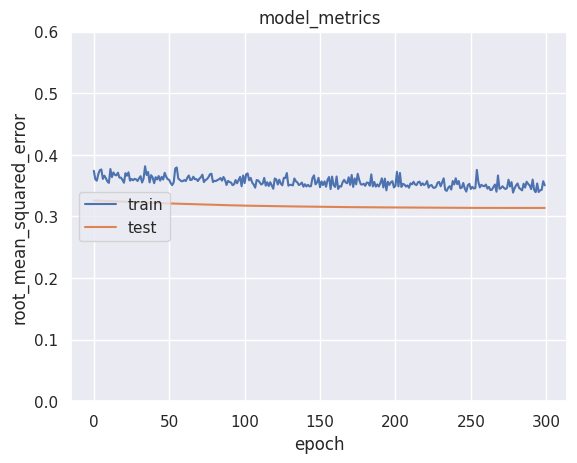

In [594]:
# Loss dan validation plot

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
# plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.6)
plt.legend(['train', 'test'], loc='center left')
plt.show()

## 4. Prediction Test

In [595]:
# Prepare dataframe
all_df = all.copy()
place_df = all.copy()
place_df = place_df[['Place_Id','Place_Name','City','Category','Rating','Price']]
place_df.columns = ['id','place_name','city','category','rating','price']

## Finding User

In [596]:
# Get user sample
user_city = 'Yogyakarta'
user_category = 'Budaya'
place_prefered_by_user = all_df[all_df.Category == user_category]
print('user_city:',user_city)
print('user_category:',user_category)
place_prefered_by_user

user_city: Yogyakarta
user_category: Budaya


,Unnamed: 0,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,0,12,52,3,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
1,1,25,52,3,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
2,2,37,52,2,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
3,3,43,52,5,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
4,4,52,52,2,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,198,385,3,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869
419,419,203,385,3,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869
420,420,213,385,5,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869
421,421,231,385,1,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869


## Create the input

In [599]:
all_place = place_df['id']
print('1. all_place:',all_place)
all_place = list(
    set(all_place)
    .intersection(set(place_to_place_encoded.keys()))
)
print('2. all_place:',all_place)
all_place = sorted(all_place)
print('3. all_place sorted():',all_place)
all_place = [[place_to_place_encoded.get(x)] for x in all_place]
print('4. all_place:',all_place)


all_category = place_df['category']
print('1. category:',all_category)
all_category = list(
    set(all_category)
    .intersection(set(category_to_category_encoded.keys()))
)
print('2. category:',all_category)
all_category = [[category_to_category_encoded.get(x)] for x in all_category]
print('3. category:',all_category)

# #
all_city = place_df['city']
print('1. city:',all_city)
all_city = list(
    set(all_city)
    .intersection(set(city_to_city_encoded.keys()))
)
print('2. city:',all_city)
all_city = [[city_to_city_encoded.get(x)] for x in all_city]
print('3. city:',all_city)


city_encoder = city_to_city_encoded.get(user_city)
category_encoder = category_to_category_encoded.get(user_category)
print('1. city_encoder:',city_encoder, ', category_encoder:',category_encoder)
city_category_array = np.hstack(
    ([[city_encoder]], [[category_encoder]])
)
# city_category_array = [[1, 0]]
print('1. city_category_array:',city_category_array)
print('1. city_category_array.shape:',city_category_array.shape)

1. all_place: 0       52
1       52
2       52
3       52
4       52
      ... 
418    385
419    385
420    385
421    385
422    385
Name: id, Length: 423, dtype: int64
2. all_place: [384, 385, 134, 145, 151, 162, 52, 204, 205, 337, 340, 90, 95, 99, 101, 361, 243, 244, 123]
3. all_place sorted(): [52, 90, 95, 99, 101, 123, 134, 145, 151, 162, 204, 205, 243, 244, 337, 340, 361, 384, 385]
4. all_place: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18]]
1. category: 0      Budaya
1      Budaya
2      Budaya
3      Budaya
4      Budaya
        ...  
418    Budaya
419    Budaya
420    Budaya
421    Budaya
422    Budaya
Name: category, Length: 423, dtype: object
2. category: ['Budaya', 'Taman Hiburan']
3. category: [[0], [1]]
1. city: 0       Jakarta
1       Jakarta
2       Jakarta
3       Jakarta
4       Jakarta
         ...   
418    Semarang
419    Semarang
420    Semarang
421    Semarang
422    Semarang
Name: city, Length: 423, dtyp

## Show recommendation to user

In [600]:
ratings_raw = model.predict(city_category_array)
ratings = model.predict(city_category_array).flatten()
print('ratings_raw:',ratings_raw)
print('ratings:',ratings)
# top_ratings_indices = ratings.argsort()[-10:][::-1] # Showing top 10 recommendation
top_ratings_indices = ratings.argsort()
print('top_ratings_indices:',top_ratings_indices)
recommended_place_ids = [
    place_encoded_to_place.get(all_place[x][0]) for x in top_ratings_indices
]
print('recommended_place_ids:',recommended_place_ids)

print('Recommendations for user:',user_city,',',user_category)
print('===' * 15,'\n')

print('')
print('----' * 15)
print('All place recommendation')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)].drop_duplicates()
print('recommended_place:\n',recommended_place)
print('----' * 15)
# for row, i in zip(recommended_place.itertuples(), range(1,11)):
for row, i in zip(recommended_place.itertuples(), range(1,len(recommended_place_ids)+1)):
    print(i,'.',row.id, row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

1/1 [==============================] - 0s 24ms/step
ratings_raw: [[0.5075311  0.51272047 0.4989406  0.50974107 0.47920945 0.49745482
  0.50808305 0.49160632 0.5025728  0.505      0.48628914 0.49608433
  0.5055735  0.5020419  0.5045186  0.5019003  0.50405645 0.5031482
  0.49993333]]
ratings: [0.5075311  0.51272047 0.4989406  0.50974107 0.47920945 0.49745482
 0.50808305 0.49160632 0.5025728  0.505      0.48628914 0.49608433
 0.5055735  0.5020419  0.5045186  0.5019003  0.50405645 0.5031482
 0.49993333]
top_ratings_indices: [ 4 10  7 11  5  2 18 15 13  8 17 16 14  9 12  0  6  3  1]
recommended_place_ids: [101, 204, 145, 205, 123, 95, 385, 340, 244, 151, 384, 361, 337, 162, 243, 52, 134, 99, 90]
Recommendations for user: Yogyakarta , Budaya

------------------------------------------------------------
Place with high rating for user
------------------------------------------------------------

------------------------------------------------------------
Top 7 place recommendation
----------

## 5. Save model

In [601]:
# model.save('model_recomm_system/model-citcat-new', save_format="tf") # OK
# model.save('model_recomm_system/model-citcat-new') # OK

# # Try this?
# file_path_h5='model_recomm_system/model.h5'
# model.save_weights('model_recomm_system/model2.h5')
# file_path_tf='model_recomm_system/model.tf'
# model.save_weights('model_recomm_system/model.tf')

# # Load the weights
# model.load_weights('path/to/weights.h5')

In [623]:
model_tes = tf.keras.models.load_model('model_recomm_system/model-citcat-new')

## 6. Convert to TFLite & Test again

In [605]:
# # Convert to TFLite

# converter = tf.lite.TFLiteConverter.from_saved_model('model_recomm_system/model-citcat-new')
converter = tf.lite.TFLiteConverter.from_keras_model(model_tes)
tflite_model = converter.convert()

In [606]:
with open('model_recomm_system/model-citcat-new.tflite', 'wb') as f:
    f.write(tflite_model)

In [607]:
interpreter = tf.lite.Interpreter(model_path="model_recomm_system/model-citcat-new.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
input_data = city_category_array  # Prepare your input data
print(input_details[0])
print(input_details[0]['shape'])
print(input_data.shape)
print(input_data)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_details[0])
print(output_details[0]['shape'])
print(output_data.shape)
print(output_data)

{'name': 'serving_default_args_0:0', 'index': 0, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.int64'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
[1 2]
(1, 2)
[[1 0]]
{'name': 'StatefulPartitionedCall:0', 'index': 58, 'shape': array([ 1, 19], dtype=int32), 'shape_signature': array([-1, 19], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
[ 1 19]
(1, 19)
[[0.5075311  0.51272047 0.4989406  0.50974107 0.47920945 0.49745482
  0.50808305 0.49160635 0.5025728  0.505      0.48628914 0.49608433
  0.5055735  0.5020419  0.5045186  0.50190026 0.50405645 0.5031482
  0.49993333]]


In [631]:
new_all_df = all.copy()
new_place_df = all.copy()
new_place_df = new_place_df[['Place_Id','Place_Name','City','Category','Rating','Price']]
new_place_df.columns = ['id','place_name','city','category','rating','price']

new_user_city = 'Yogyakarta' ##Input city
new_user_category = 'Taman Hiburan' ##Input category


all_place = new_place_df['id'] ##Ambil semua id place
all_place = list(
    set(all_place)
    .intersection(set(place_to_place_encoded.keys())) #Ubah jadi list
)
print('2. all_place:',all_place)
# all_place = sorted(all_place)
print('3. all_place sorted():',all_place)
all_place = [[place_to_place_encoded.get(x)] for x in all_place] ##Buat semua id place jadi 0-18
print('4. all_place:',all_place)


city_encoder = city_to_city_encoded.get(new_user_city) ##Buat jadi 0-3
category_encoder = category_to_category_encoded.get(new_user_category) ##Buat jadi 0-1

input_array = np.hstack(
    ([[city_encoder]], [[category_encoder]])
) ##Buat INPUT nya


#HASIL PREDIKSI
# ratings = model_tes.predict(input_array)
ratings = model_tes.predict(input_array).flatten()
print('ratings:',ratings)

top_ratings_indices_Full = ratings.argsort() ##Urutkan Indexnya, Semua
top_ratings_indices = ratings.argsort()[-5:][::-1] ##Urutkan Indexnya, Ambil Top5
print('top_ratings_indices:',top_ratings_indices_Full)
print('top_ratings_indices:',top_ratings_indices)

recommended_place_ids = [
    place_encoded_to_place.get(all_place[x][0]) for x in top_ratings_indices
] ##Ubah indexnya sesuai dgn yg 0-18 tadi
print('recommended_place_ids:',recommended_place_ids)

## Show TOP 5 recommended place
recommended_place = new_place_df[new_place_df['id'].isin(recommended_place_ids)].drop_duplicates()
print('recommended_place:\n',recommended_place)

2. all_place: [384, 385, 134, 145, 151, 162, 52, 204, 205, 337, 340, 90, 95, 99, 101, 361, 243, 244, 123]
3. all_place sorted(): [384, 385, 134, 145, 151, 162, 52, 204, 205, 337, 340, 90, 95, 99, 101, 361, 243, 244, 123]
4. all_place: [[17], [18], [6], [7], [8], [9], [0], [10], [11], [14], [15], [1], [2], [3], [4], [16], [12], [13], [5]]
1/1 [==============================] - 0s 130ms/step
ratings: [0.5066327  0.5086946  0.49857992 0.5065821  0.484678   0.49788687
 0.5054872  0.49317464 0.5015483  0.50364786 0.48988745 0.49738395
 0.5038369  0.5014017  0.503735   0.5013558  0.50264    0.5019878
 0.49983916]
top_ratings_indices: [ 4 10  7 11  5  2 18 15 13  8 17 16  9 14 12  6  3  0  1]
top_ratings_indices: [ 1  0  3  6 12]
recommended_place_ids: [385, 384, 145, 52, 95]
recommended_place:
       id                           place_name        city       category  \
0     52                         Kampung Cina     Jakarta         Budaya   
42    95   Desa Wisata Sungai Code Jogja Kota  Y